# Fashion4You

## Install Dependencies

In [ ]:
!pip install langchain

In [ ]:
!pip install openai

In [ ]:
!pip install fashion-clip

In [ ]:
!pip install serpapi

In [113]:
!pip install google-search-results

  Preparing metadata (setup.py) ... done
  Created wheel for google-search-results: filename=google_search_results-2.4.2-py3-none-any.whl size=32003 sha256=c958993a66c4efe2014c3f8224afc8fe325919173005c4d384b90f50cfec231d
  Stored in directory: /root/.cache/pip/wheels/d3/b2/c3/03302d12bb44a2cdff3c9371f31b72c0c4e84b8d2285eeac53
Successfully built google-search-results


In [122]:
from langchain.agents import load_tools
from langchain.agents import initialize_agent
from langchain import PromptTemplate
from langchain.llms import OpenAI
from openai import ChatCompletion
from fashion_clip.fashion_clip import FashionCLIP
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [79]:
import os
os.environ["OPENAI_API_KEY"] =""

# Image Processing

In [ ]:
def

# Display uploaded images!

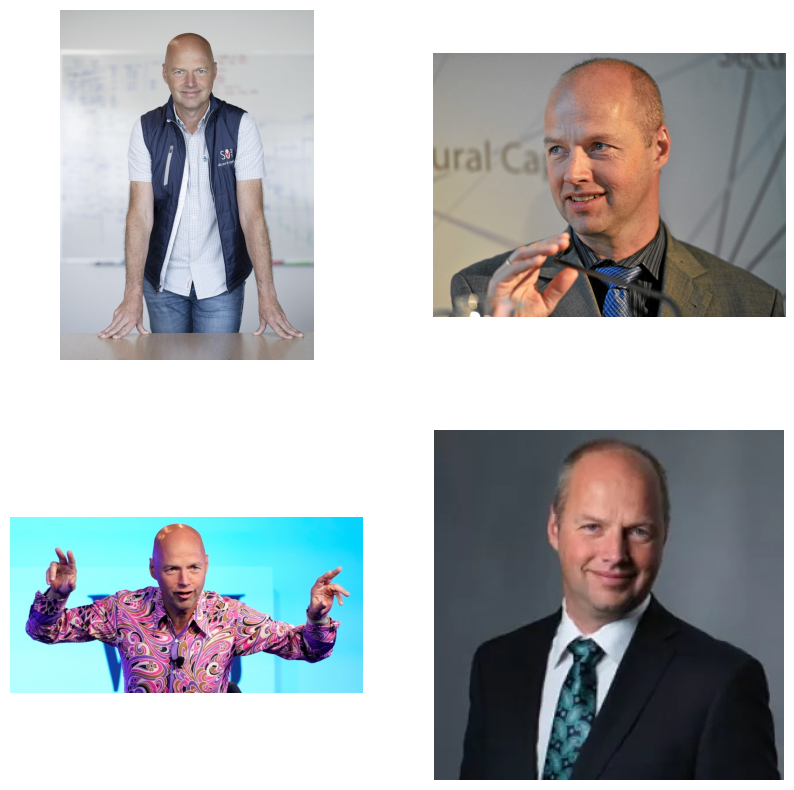

In [86]:
img1 = cv2.cvtColor(cv2.imread('positive.jpg'), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread('positive_2.jpg'), cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(cv2.imread('negative.jpeg'), cv2.COLOR_BGR2RGB)
img4 = cv2.cvtColor(cv2.imread('negative_2.jpg'), cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Display images
axs[0, 0].imshow(img1)
axs[0, 0].axis('off')

axs[0, 1].imshow(img2)
axs[0, 1].axis('off')

axs[1, 0].imshow(img3)
axs[1, 0].axis('off')

axs[1, 1].imshow(img4)
axs[1, 1].axis('off')

plt.show()


# Summarize what the clothes are like!

In [149]:
fclip = FashionCLIP('fashion-clip')

def get_embeddings (paths):
    embeddings = fclip.encode_images(paths, batch_size=32)
    embeddings = embeddings/np.linalg.norm(embeddings, ord=2, axis=-1, keepdims=True)
    return embeddings

def get_style_attributes():
    return  {
	"Formality" :[ "Business formal", "Business casual", "Cocktail attire", "Casual chic", "Smart-casual", "Bohemian casual", "Lounge-wear", "Streetwear", "Sporty casual", "Urban style", "Beachy", "Vintage-inspired", "Gothic", "Grunge", "Preppy", "Hipster", "Artsy", "Eclectic", "Minimalist", "Avant-garde"],
	"Color_Palette" :[ "Monochromatic", "Pastel hues", "Earth tones", "Neon colors", "Jewel tones", "Muted shades", "Black and white", "Vibrant primaries", "Cool blues and greens", "Warm reds and oranges", "Subdued greys", "Floral prints", "Nautical colors", "Earthy browns", "Rainbow spectrum", "Metallic accents", "Camouflage", "Vintage faded", "Iridescent", "Polka dots"],
	"Pattern_and_Print" :[ "Stripes", "Plaid", "Polka dots", "Paisley", "Floral", "Geometric", "Animal print", "Camouflage", "Abstract", "Houndstooth", "Chevron", "Gingham", "Tie-dye", "Tartan", "Aztec", "Bohemian prints", "Tribal patterns", "Damask", "Checkered", "Ikat"],
	"Texture" :[ "Silk and satin", "Denim", "Leather", "Velvet", "Corduroy", "Linen", "Lace", "Fleece", "Tweed", "Knit", "Faux fur", "Seersucker", "Chiffon", "Sequins", "Suede", "Brocade", "Organza", "Tulle", "Mohair", "Cashmere"],
	"Fit" :[ "Slim-fit", "Relaxed-fit", "Tailored", "Oversized", "Skinny", "Loose", "Cropped", "Baggy", "Form-fitting", "Flowy", "A-line", "Boyfriend", "Bootcut", "Flared", "Straight-leg", "Drop-crotch", "Athletic", "Paperbag waist", "Empire waist", "Peplum"],
	"Colors" :[ "Red", "Blue", "Green", "Yellow", "Orange", "Purple", "Pink", "Black", "White", "Gray", "Brown", "Beige", "Turquoise", "Teal", "Navy", "Lavender", "Magenta", "Cyan", "Gold", "Silver"],

}

def analyze_style(good_images, bad_images):
    style_attributes = get_style_attributes()
    good_image_embeddings = get_embeddings(good_images)
    bad_image_embeddings = get_embeddings(bad_images)
# predict every style_attributes for st_image_embeddings:
    good_style = {}
    bad_style = {}
    for style_attribute in style_attributes:
        style_attribute_prompts = [f"{k}: {style_attribute}" for k in style_attributes[style_attribute]]
        style_attribute_embeddings = fclip.encode_text(style_attribute_prompts, batch_size=32)
        style_attribute_embeddings = style_attribute_embeddings/np.linalg.norm(style_attribute_embeddings, ord=2, axis=-1, keepdims=True)
        good_predicted_style_attribute_distribution = style_attribute_embeddings.dot(good_image_embeddings.T)
        bad_predicted_style_attribute_distribution = style_attribute_embeddings.dot(bad_image_embeddings.T)
        good_predicted = [style_attributes[style_attribute][k] for k in np.argmax(good_predicted_style_attribute_distribution, axis=0)]
        bad_predicted = [style_attributes[style_attribute][k] for k in np.argmax(bad_predicted_style_attribute_distribution, axis=0)]
        good_style[style_attribute] = good_predicted
        bad_style[style_attribute] = bad_predicted
    return good_style, bad_style


def get_query(good_style, bad_style):
    return f"""

    The following attributes describe clothes that suit a person well:
    {good_style}

    The following attributes describe clothes that suit a person poorly:
    {bad_style}
    Write a tagline that summarizes the person's style?

    """

good_images = ["positive.jpg", "positive_2.jpg"]
bad_images = ["negative_2.jpg", "negative.jpeg"]

good_style, bad_style = analyze_style(good_images, bad_images)
query = get_query(good_style, bad_style)

llm = OpenAI(temperature=0.9)
fashion_description = llm(query)
print(fashion_description)


1it [00:00,  2.04it/s]
1it [00:00,  2.34it/s]


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

1it [00:03,  3.69s/it]


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

1it [00:02,  2.29s/it]


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

1it [00:02,  2.20s/it]


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

1it [00:03,  3.63s/it]


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

1it [00:02,  2.43s/it]


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

1it [00:02,  2.23s/it]



    A fashionable blend of sporty casuals, tailored fits, and nautical colors for a timelessly stylish look.


In [150]:
llm = OpenAI(temperature=0.9)
description_summary = llm("Summarize the fashion style of a person in three words based on the following description: ", description)
print(description_summary)



The person likes to wear stylish but comfortable clothing, often incorporating pastel colors and unique patterns.

Comfortable, Pastel, Unique


In [127]:
questions = ["What kind of occasion are considering the clothes for (if any)?",
             "What price range is acceptable to you?"]

current_session_messages = []

def respond(message, history):

  if not history:
    return questions[0]

  question_idx = len(history)

  current_session_messages.append(message)

  if len(history) < 2:
    current_session_messages.append(questions[question_idx])
    return questions[question_idx]
  else:
    current_session_messages.append("Looking into awesome recommendations for you!")
    return "Looking into awesome recommendations for you!"

In [176]:
import gradio as gr
description = """
              <div style="font-family: 'Courier New'; font-size: 20px;">
                  <b>"Hi there! Welcome to fashion4you! We'll help you find personalized style recommendations based on your taste and budget. What kind of clothing are you looking for?"</b>
              </div>
              """
demo = gr.ChatInterface(respond, description=description)
demo.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://ab0b0b791de67c12d6.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [177]:
text_concat=""

In [178]:
initial_prompt = "Hi there! Welcome to fashion4you! We'll help you find personalized style recommendations based on your taste and budget. What kind of clothing are you looking for?"
conversation = "\n".join(current_session_messages)
text_concat = "Description: " + fashion_description + "\n" + initial_prompt + "\n" + conversation

In [179]:
print(text_concat)

Description: 
    A fashionable blend of sporty casuals, tailored fits, and nautical colors for a timelessly stylish look.
Hi there! Welcome to fashion4you! We'll help you find personalized style recommendations based on your taste and budget. What kind of clothing are you looking for?
I'm launching a new startup and want to dress to impress
What price range is acceptable to you?
I'm Sebastian Thrun. A million dollars.
Looking into awesome recommendations for you!
I'm launching a startup and need a men's suit for the launch event
What price range is acceptable to you?
I'm Sebastian Thrun. A million dollars.
Looking into awesome recommendations for you!


In [180]:
prompt = "You are an expert men's fashion advisor. Based on the following context about the client, write a concise google shopping query \
 to find fashion items that could fit for your client." + 'context: """' + text_concat + '"""'

In [181]:
from langchain.chat_models import ChatOpenAI
from langchain.schema import HumanMessage

chat = ChatOpenAI(openai_api_key=os.environ.get("OPENAI_API_KEY"))

message_out = chat([HumanMessage(content=prompt)])
query = message_out.content
print(query)

men's suit for startup launch event price range: $100-$1000


In [182]:
from langchain.chat_models import ChatOpenAI
from langchain.chains import create_extraction_chain
from serpapi import GoogleSearch

# Schema
schema = {
    "properties": {
        "minimum_price": {"type": "integer"},
        "maximum_price": {"type": "integer"},
        "color_value": {"type": "string"},
        "gender": {"type": "string"},
    },
    "required": ["query_for_google_shopping"]
}

# Run chain
llm = ChatOpenAI(temperature=0, model="gpt-3.5-turbo")
chain = create_extraction_chain(schema, llm)

specs_dict = chain.run(text_concat)[0]

In [183]:
params = {
  "engine": "google_shopping",
  "q": query, #+ "gender {}".format(specs_dict['gender']),
  "location": "San Francisco, California, United States", # fixed
  "hl": "en", #
  "gl": "us",
  "tbs": "pr:1,ppr_min:{},ppr_max:{},color:specific".format(
    specs_dict['minimum_price'],
    specs_dict['maximum_price']
    ),
  "api_key": ""
}

In [184]:
search = GoogleSearch(params)
results = search.get_dict()
shopping_results = results["shopping_results"]

In [186]:
top_results = shopping_results[0:2]

thumbnails = [item['thumbnail'] for item in top_results]
titles = [item['title'] for item in top_results]
product_link = [item['product_link'] for item in top_results]
prices = [item['price'] for item in top_results]

# download the thumbnails as images
import urllib.request
i=0
for image in thumbnails:
    urllib.request.urlretrieve(image, f"thumbnail_{i}.jpg")
    i+=1



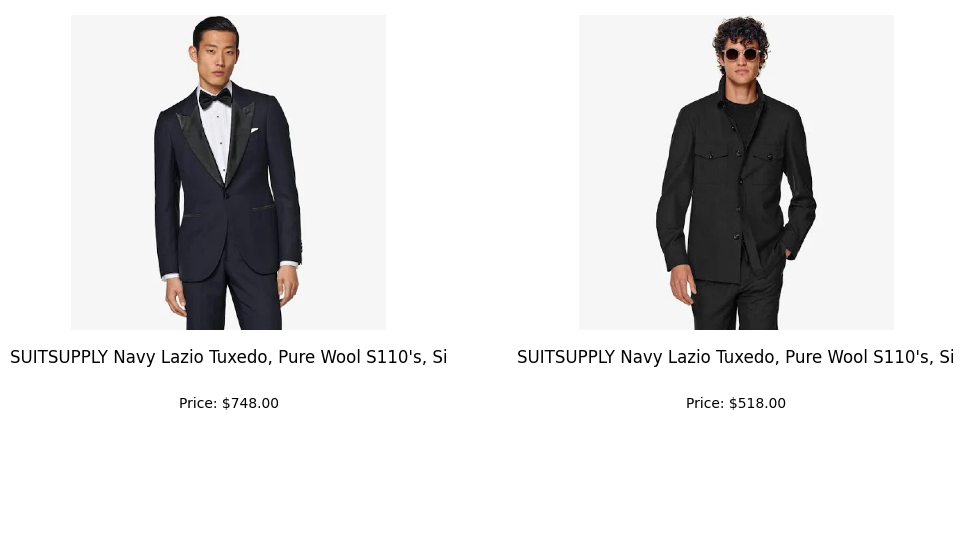

https://www.google.com/shopping/product/4829401566308137435?gl=us
https://www.google.com/shopping/product/2371046752561366820?gl=us


In [187]:
def display_product(image_url, title, price, ax):
    # Load and display the product thumbnail
    image = mpimg.imread(image_url)
    imagebox = OffsetImage(image, zoom=0.5)
    ab = AnnotationBbox(imagebox, (0.5, 0.8), frameon=False, xycoords='axes fraction', boxcoords="axes fraction")
    ax.add_artist(ab)

    # Add product details
    ax.text(0.5, 0.4, f"{title}", ha="center", va="center", fontsize=12)
    ax.text(0.5, 0.3, f"Price: {price}", ha="center", va="center", fontsize=10)

# Create a figure with two subplots in one row and two columns, and make it wider
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Display the first product in the first subplot (ax1)
display_product("thumbnail_0.jpg", titles[0][:50], prices[0], ax1)

# Display the second product in the second subplot (ax2)
display_product("thumbnail_1.jpg",titles[0][:50], prices[1], ax2)

# Remove axes and display the subplots
ax1.axis('off')
ax2.axis('off')
plt.show()
print(product_link[0])
print(product_link[1])
